# Free Recall
## Computational Methods in Psychology (and Neuroscience)
### Psychology 4215/7215 --- Fall 2021
By: Per B. Sederberg, PhD



# Lesson Objectives

Upon completion of this lesson, students should have learned:

1. Review of Free Recall variants
2. Load in and process free recall data
3. Test math performance
4. Evaluate recall performance


# Free Recall

## General structure

`STUDY list (12 items)` -> `MATH distractor (20 sec)` -> `Free Recall (45 sec)`

## Core premise

*What you recall, and the order in which you recall it, can inform the associative processes used to guide episodic memory retrieval.*

# Deese-Roediger-McDermott (DRM) Task

Structure the study lists such that participants have an increased tendency to generate false recalls.

## Example list

```
NOSE
BREATHE
SNIFF
AROMA
HEAR
SEE
NOSTRIL
WHIFF
SCENT
REEK
STENCH
FRAGRANCE
```

# New libraries to install

You're going to need a new plotting library, so run this line at your Anaconda Prompt/Terminal:

`conda install seaborn`

You'll also need this library for free recall analysis:

`pip install quail` 

In [115]:
# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting
import plotnine as pn
import scipy.stats.distributions as dists     # probability distributions
from scipy import stats
from glob import glob
import os

# smile for reading logs
from smile.log import log2dl
from ci_within import ci_within

# statsmodels for stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# set seaborn context for bigger plots
import seaborn as sns
sns.set_context('talk')

## Custom SLOG loading function

In [2]:
# custom function to load slogs
def load_all_subj_logs(data_dir, log_file):
    # load in a list of all the subj
    subjs = [os.path.splitext(os.path.split(filepath)[1])[0].split('_')[0]
             for filepath in glob(os.path.join(data_dir, '*' + log_file + '.slog'))]
    subjs.sort()
    #print(subjs)
    # loop over subj and their data
    all_dat = []
    for subj in subjs:
        # set the file
        log_path = os.path.join(data_dir, subj+'_'+log_file+'.slog')
        print(log_path)

        # load the data
        try:
            all_dat.extend(log2dl(log_path, subj=subj))
        except:
            pass

    df = pd.DataFrame(all_dat)
    
    return df

## Load in all the data

In [131]:
# load the data from each task
data_dir = 'free_recall_data'
df_s = load_all_subj_logs(data_dir, 'log_study')
df_r = load_all_subj_logs(data_dir, 'log_recall')
df_m = load_all_subj_logs(data_dir, 'log_math_distract')
df_s.head()

free_recall_data/s000_log_study.slog
free_recall_data/s001_log_study.slog
free_recall_data/s002_log_study.slog
free_recall_data/s003_log_study.slog
free_recall_data/s004_log_study.slog
free_recall_data/s005_log_study.slog
free_recall_data/s006_log_study.slog
free_recall_data/s007_log_study.slog
free_recall_data/s008_log_study.slog
free_recall_data/s009_log_study.slog
free_recall_data/s010_log_study.slog
free_recall_data/s011_log_study.slog
free_recall_data/s012_log_study.slog
free_recall_data/s000_log_recall.slog
free_recall_data/s001_log_recall.slog
free_recall_data/s002_log_recall.slog
free_recall_data/s003_log_recall.slog
free_recall_data/s004_log_recall.slog
free_recall_data/s005_log_recall.slog
free_recall_data/s006_log_recall.slog
free_recall_data/s007_log_recall.slog
free_recall_data/s008_log_recall.slog
free_recall_data/s009_log_recall.slog
free_recall_data/s010_log_recall.slog
free_recall_data/s011_log_recall.slog
free_recall_data/s012_log_recall.slog
free_recall_data/s000_log

,block_num,trial_num,stim_on_time,stim_on_error,log_time,word,cond,serial_pos,critical_word,subj,log_num
0,0,0,48.497539,0.0,50.591471,COUNTRY,DRM,1,city,s000,0
1,0,1,50.607072,0.0,52.466492,STREET,DRM,2,city,s000,0
2,0,2,52.480423,0.0,54.377311,VILLAGE,DRM,3,city,s000,0
3,0,3,54.391027,0.0,56.567661,STATE,DRM,4,city,s000,0
4,0,4,56.579191,0.0,58.497010,CHICAGO,DRM,5,city,s000,0


## Binomial test of math performance

In [132]:
df_m.head()

,correct,resp,rt,trial_appear_time,trial_appear_error,press_time_time,press_time_error,log_time,text,condition,correct_key,subj,log_num
0,False,J,3.043467,73.971691,0.0,77.015158,0.000166,77.515158,2 + 8 + 4 = 4,False,F,s000,0
1,True,F,0.670359,78.528665,0.0,79.199024,0.000169,79.699024,6 + 3 + 5 = 24,False,F,s000,0
2,True,J,1.647502,80.704973,0.0,82.352476,0.000177,82.852476,10 + 6 + 6 = 22,True,J,s000,0
3,False,F,1.547946,83.862600,0.0,85.410546,0.000156,85.910546,10 + 9 + 7 = 26,True,J,s000,0
4,True,J,1.505560,86.923595,0.0,88.429155,0.000163,88.929155,10 + 10 + 5 = 25,True,J,s000,0


In [133]:
# get counts and mean perf for each subject
mperf = df_m.groupby(['subj'])['correct'].agg(['sum', 'count', 'mean'])
mperf.head()

,sum,count,mean
subj,,,
s000,33,44,0.750000
s001,38,48,0.791667
s002,38,45,0.844444
s003,32,35,0.914286
s004,41,55,0.745455


In [134]:
# add the binom_test p value as a new column (axis=1 tells it to go by row)
mperf['binom_pval'] = mperf.apply(lambda x: stats.binom_test(x['sum'], n=x['count'], 
                                                             p=0.5, alternative='greater'),
                                  axis=1)

# they are good if the mean is greater than 0.5 and the pval is less that .05
mperf['good'] = (mperf['mean']>0.5) & (mperf['binom_pval'] <= 0.05)
mperf

,sum,count,mean,binom_pval,good
subj,,,,,
s000,33,44,0.750000,6.300169e-04,True
s001,38,48,0.791667,3.084820e-05,True
s002,38,45,0.844444,1.560655e-06,True
s003,32,35,0.914286,2.088491e-07,True
s004,41,55,0.745455,1.776406e-04,True
s005,45,53,0.849057,1.184176e-07,True
s006,54,63,0.857143,3.054140e-09,True
s007,35,50,0.700000,3.300224e-03,True
s008,51,65,0.784615,2.237612e-06,True


## Free recall analysis

![Quail](https://raw.githubusercontent.com/ContextLab/quail/master/images/Quail_Logo_small.png)

Library developed in Jeremy Manning's lab at Dartmouth.

## Some data processing

Quail needs lists of lists indicating the study words and the recalled words.

In [207]:
# grab all the study lists
study_lists = df_s.groupby(['subj', 'cond', 'block_num'])['word'].agg(list).reset_index()
study_lists.head()

,subj,cond,block_num,word
0,s000,Control,1,"[ELM, HURRICANE, DRAW, CANDLE, FORM, STORM, RI..."
1,s000,Control,3,"[TALK, GLOVE, BEEF, LIQUID, COIN, ROOT, TAPE, ..."
2,s000,Control,4,"[COAT, POLLEN, CHILD, POUCH, FLOOR, MEAT, PICT..."
3,s000,Control,7,"[WORKING, CALL, NAME, SADDLE, WALLET, CHURCH, ..."
4,s000,Control,9,"[THRILL, FOOL, DRESS, GRIND, TELEGRAPH, FACE, ..."


In [209]:
# extract a list of lists for each study list condition
study_control = list(study_lists[study_lists['cond']=='Control']
                     .groupby(['subj'])['word'].agg(list).reset_index()['word'])
study_drm = list(study_lists[study_lists['cond']=='DRM']
                     .groupby(['subj'])['word'].agg(list).reset_index()['word'])

In [34]:
# generate lists of lists for the recalled items
recall_lists = df_r.groupby(['subj', 'cond', 'block_num'])['response'].agg(list).reset_index()

recall_control = list(recall_lists[study_lists['cond']=='Control']
                     .groupby(['subj'])['response'].agg(list).reset_index()['response'])
recall_drm = list(recall_lists[study_lists['cond']=='DRM']
                     .groupby(['subj'])['response'].agg(list).reset_index()['response'])

In [79]:
# combine the control and drm
study_all = [sc+sd for sc,sd in zip(study_control, study_drm)]
recall_all = [rc+rd for rc,rd in zip(recall_control, recall_drm)]


## Make some eggs

In [80]:
# create quail eggs
egg_control = quail.Egg(pres=study_control, rec=recall_control)
egg_drm = quail.Egg(pres=study_drm, rec=recall_drm)
egg_all = quail.Egg(pres=study_all, rec=recall_all)
egg_all.info()

Number of subjects: 13
Number of lists per subject: 10
Number of words per list: 12
Date created: Wed Nov 10 22:28:48 2021
Meta data: {}


In [88]:
# set up the list groups
# first lists per subj are Control, next are DRM
listgroup = ['Control']*egg_control.n_lists + ['DRM']*egg_drm.n_lists

## Overall accuracy as a function of condition

<AxesSubplot:xlabel='List', ylabel='Accuracy'>

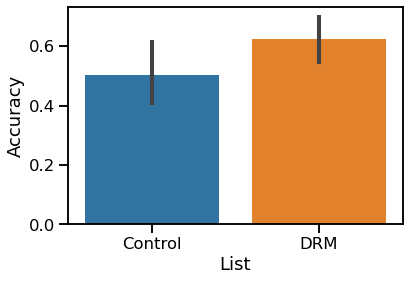

In [105]:
acc = quail.analyze(egg_all, analysis='accuracy', 
                    listgroup=listgroup)
acc.plot()  # not a within-subj corrected errorbar

In [211]:
# extract accuracy values from the analysis (and fix the column)
acc_df = acc.get_data().reset_index()
cols = list(acc_df.columns)
cols[2] = 'Accuracy'
acc_df.columns = cols
acc_df.head()

,Subject,List,Accuracy
0,0,Control,0.283333
1,0,DRM,0.516667
2,1,Control,0.316667
3,1,DRM,0.500000
4,2,Control,0.366667


In [121]:
# test for significant effect of list condition
model = smf.ols("Accuracy ~ List", acc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.011
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0955
Time:                        23:08:15   Log-Likelihood:                 9.4389
No. Observations:                  26   AIC:                            -14.88
Df Residuals:                      24   BIC:                            -12.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5038      0.049     10.370      0.000       0.404       0.604
List[T.DRM]     0.1192      0.069      1.735      0.096      -0.023       0.261
==============================================================================
Omnibus:                        3.313   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.240
Skew:                           0.716   Prob(JB):                        0.326
Kurtosis:                       3.127   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Signs of a trend in accuracy difference

## Serial Position Curve

We can analyze recall as a function of serial position to see whether there are primacy and recency effects. 

The fast presentation rate should have attenuated primacy.

The math distractor should have attenuated recency.

<AxesSubplot:xlabel='Position', ylabel='Proportion Recalled'>

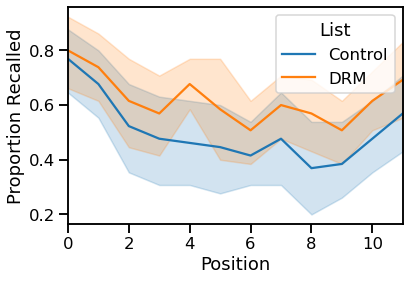

In [94]:
spc = quail.analyze(egg_all, analysis='spc', 
                    listgroup=listgroup)
spc.plot()

## Probability of First Recall

Instead of collapsing the data over all recalls, we can evaluate how participants initiate recall. This provides insight as to what type of cue they are using to start the recall process.

<AxesSubplot:xlabel='Position', ylabel='Probability of Recall: Position 0'>

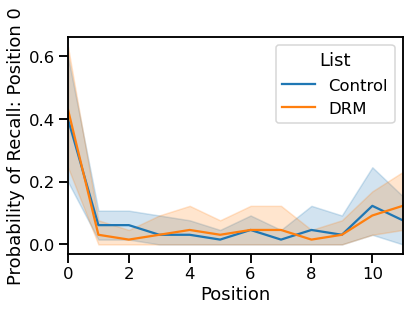

In [95]:
pfr = quail.analyze(egg_all, analysis='pfr', 
                    listgroup=listgroup)
pfr.plot()

### There is some evidence for primacy and initiating recall with the start of the list

## Conditional Response Probability

Kahana (1996) developed a way to analyze recall trajectories. For a recall at any givin serial position, the method calculates the probability of the next recall being from any of the other serial positions.

Usually demonstrates two phenomena: 

1. **Contiguity**: That participants tend to transition to nearby serial positions.
2. **Forward Asymmetry**: That participants transition more in the forward than backwards direction

/home/per/anaconda3/envs/smile/lib/python3.9/site-packages/quail/analysis/lagcrp.py:129: RuntimeWarning: Mean of empty slice


<AxesSubplot:xlabel='Position', ylabel='Conditional Response Probability'>

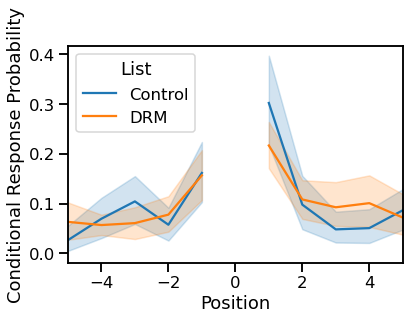

In [96]:
crp = quail.analyze(egg_all, analysis='lagcrp', 
                    listgroup=listgroup)
crp.plot()

## Temporal Factor

It's hard to summarize the full CRP, so we developed an approach to quantifying the degree of temporal clustering. 

Here, a temporal factor of 0.5 means that you spread your recalls equally throughout the list. Values greater than 0.5 mean that you transition to nearby items (i.e., contiguity)

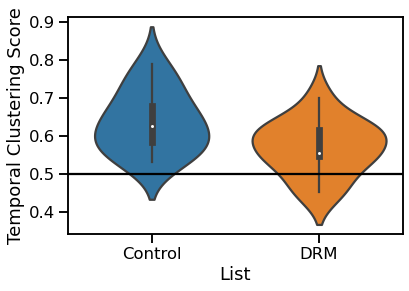

In [97]:
tfact = quail.analyze(egg_all, analysis='temporal', 
                      listgroup=listgroup)
ax = tfact.plot(plot_style='violin')
ax.axhline(0.5, color='k')

In [135]:
# Now we can test for significance
tf_df = tfact.get_data().reset_index()
cols = list(tf_df.columns)
cols[2] = 'TemFact'
tf_df.columns = cols
tf_df.head()

,Subject,List,TemFact
0,0,Control,0.738737
1,0,DRM,0.607766
2,1,Control,0.538030
3,1,DRM,0.548819
4,2,Control,0.562283


In [130]:
model = smf.ols("TemFact ~ List", tf_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TemFact   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     5.100
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0333
Time:                        23:11:33   Log-Likelihood:                 31.156
No. Observations:                  26   AIC:                            -58.31
Df Residuals:                      24   BIC:                            -55.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6368      0.021     30.218      0.000       0.593       0.680
List[T.DRM]    -0.0673      0.030     -2.258      0.033      -0.129      -0.006
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.738
Skew:                           0.218   Prob(JB):                        0.691
Kurtosis:                       2.299   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significant drop in temporal clustering for DRM lists with semantically-related words

## False Recall

Each DRM list has a "Critical Word" that was not on the list, but is related to all the other items on the list.

This can induce false memories of the items actually being presented.

In [212]:
# convert the critical word to all caps
df_s['critical_word'] = df_s['critical_word'].str.upper()
df_s.head()

,block_num,trial_num,stim_on_time,stim_on_error,log_time,word,cond,serial_pos,critical_word,subj,log_num
0,0,0,48.497539,0.0,50.591471,COUNTRY,DRM,1,CITY,s000,0
1,0,1,50.607072,0.0,52.466492,STREET,DRM,2,CITY,s000,0
2,0,2,52.480423,0.0,54.377311,VILLAGE,DRM,3,CITY,s000,0
3,0,3,54.391027,0.0,56.567661,STATE,DRM,4,CITY,s000,0
4,0,4,56.579191,0.0,58.497010,CHICAGO,DRM,5,CITY,s000,0


In [185]:
# extract the critical word for each DRM list
drm_cr = df_s.loc[(df_s['trial_num']==0)&(df_s['cond']=='DRM'), 
                  ['subj', 'block_num', 'critical_word']]
drm_cr.head()

,subj,block_num,critical_word
0,s000,0,CITY
24,s000,2,SOFT
60,s000,5,CUP
72,s000,6,ROUGH
96,s000,8,SWEET


In [195]:
# loop over each drm list and see if the subj recalled that critical word
cw_recs = []
for i, cw in drm_cr.iterrows():
    ind = (df_r['subj']==cw['subj']) & (df_r['block_num']==cw['block_num'])
    recalls = df_r.loc[ind, 'response']
    cr_recalled = cw['critical_word'] in recalls.unique()
    cw_recs.append({'subj': cw['subj'],
                    'block_num': cw['block_num'],
                    'critical_word': cw['critical_word'],
                    'recalled': cr_recalled})
cw_recs = pd.DataFrame(cw_recs)
cw_recs

,subj,block_num,critical_word,recalled
0,s000,0,CITY,False
1,s000,2,SOFT,False
2,s000,5,CUP,False
3,s000,6,ROUGH,False
4,s000,8,SWEET,True
...,...,...,...,...
60,s012,2,SLOW,True
61,s012,5,SWEET,False
62,s012,6,MOUNTAIN,False
63,s012,7,CUP,False


In [203]:
# calculate each subject's proportion of time recalling the critical word
cw_res = cw_recs.groupby('subj')['recalled'].mean().reset_index()
cw_res

,subj,recalled
0,s000,0.2
1,s001,0.2
2,s002,0.2
3,s003,0.0
4,s004,0.0
5,s005,0.2
6,s006,0.2
7,s007,0.6
8,s008,0.4
9,s009,0.0


In [213]:
# Test whether the proportion is significant
print('Mean:', cw_res['recalled'].mean())
stats.ttest_1samp(cw_res['recalled'], popmean=0.0)

Mean: 0.24615384615384617


Ttest_1sampResult(statistic=4.3817804600413295, pvalue=0.0008935054959037181)

## Conclusion

- Free recall reveals the associative processes that underlie episodic memory retrieval.
- Participants recalled more items on DRM than control lists.
- But relied less on forming associations between nearby items on the lists.
- There was significant false memory on the DRM lists, whereby participants recalled a significant portion of the "critical words" that were not on the list.

## Assignment before next class

- We will post a small set of analyses to run extending the examples in this class
- This will be due on ***Thursday*** next week

### See you next week!!!